In [1]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression as LR
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

df = pd.read_csv('rankingcard.csv', index_col=0)
print(df.shape)
df.info()

(150000, 11)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  

In [2]:
#去除重复值
df.drop_duplicates(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [3]:
df.index=range(df.shape[0])

In [4]:
# 检查各个特征的缺失情况
df.isnull().sum()/df.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [5]:
# 均值填充
df["NumberOfDependents"].fillna(df["NumberOfDependents"].mean(),inplace=True)

In [6]:
# 再次检查各个特征的缺失情况
df.isnull().sum()/df.shape[0]

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [7]:
X = df.iloc[:,1:]
y = df["SeriousDlqin2yrs"]

In [8]:
df.loc[:,"MonthlyIncome"].isnull().sum()

29221

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor

def fill_missing_rf(X, y, fillcolumn):
    df = X.copy()
    # 待预测列
    fill_df = df.loc[:, fillcolumn]
    # 去除预测列，将剩下的列与标签组成数据集
    df = pd.concat([df.loc[:, df.columns != fillcolumn], pd.DataFrame(y)], axis=1)
    # 训练集和测试集
    y_train = fill_df[fill_df.notnull()]
    y_test = fill_df[fill_df.isnull()]
    X_train = df.iloc[y_train.index, :]
    X_test = df.iloc[y_test.index, :]
    # 预测
    rfr = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
    y_pred = rfr.predict(X_test)

    return y_pred

y_pred = fill_missing_rf(X,y,"MonthlyIncome")
y_pred.shape

(29221,)

In [10]:
# 填充原来的数据
df.loc[df.loc[:, 'MonthlyIncome'].isnull(), 'MonthlyIncome'] = y_pred
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         149391 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    149391 non-null  float64
dtype

In [11]:
df.to_csv("no_null_rankingcard.csv",index=False)

In [12]:
#描述性统计
df.describe([0.01,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,10%,25%,50%,75%,90%,99%,max
SeriousDlqin2yrs,149391.0,0.066999,0.250021,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.0
RevolvingUtilizationOfUnsecuredLines,149391.0,6.071087,250.263672,0.0,0.0,0.003199,0.030132,0.154235,0.556494,0.978007,1.093922,50708.0
age,149391.0,52.306237,14.725962,0.0,24.0,33.000000,41.000000,52.000000,63.000000,72.000000,87.000000,109.0
NumberOfTime30-59DaysPastDueNotWorse,149391.0,0.393886,3.852953,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,98.0
DebtRatio,149391.0,354.436740,2041.843455,0.0,0.0,0.034991,0.177441,0.368234,0.875279,1275.000000,4985.100000,329664.0
MonthlyIncome,149391.0,5427.483661,13228.274569,0.0,0.0,0.180000,1800.000000,4429.000000,7416.000000,10800.000000,23250.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,149391.0,8.480892,5.136515,0.0,0.0,3.000000,5.000000,8.000000,11.000000,15.000000,24.000000,58.0
NumberOfTimes90DaysLate,149391.0,0.238120,3.826165,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,98.0
NumberRealEstateLoansOrLines,149391.0,1.022391,1.130196,0.0,0.0,0.000000,0.000000,1.000000,2.000000,2.000000,4.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,149391.0,0.212503,3.810523,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,98.0


In [13]:
df = df[df['age']>0]
df = df[df['NumberOfTime30-59DaysPastDueNotWorse']<90]
df = df[df['NumberOfTime60-89DaysPastDueNotWorse']<90]
df = df[df['NumberOfTimes90DaysLate']<90]
df.reset_index(drop=True, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149165 entries, 0 to 149164
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149165 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149165 non-null  float64
 2   age                                   149165 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149165 non-null  int64  
 4   DebtRatio                             149165 non-null  float64
 5   MonthlyIncome                         149165 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149165 non-null  int64  
 7   NumberOfTimes90DaysLate               149165 non-null  int64  
 8   NumberRealEstateLoansOrLines          149165 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149165 non-null  int64  
 10  NumberOfDependents                    149165 non-null  float64
dtype

In [14]:
df['SeriousDlqin2yrs'].value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [15]:
df.head(5)
print(df.shape)

(149165, 11)


In [16]:
df['SeriousDlqin2yrs'].value_counts()

0    139292
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [17]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=20,n_jobs=-1)
# 返回已经上采样后的数据和标签
X_old = df.iloc[:,1:]
y_old = df["SeriousDlqin2yrs"]
X,y = sm.fit_resample(X_old,y_old)
# 结果转为dataframe
X = pd.DataFrame(X) 
y = pd.DataFrame(y) 
y.value_counts()

SeriousDlqin2yrs
0                   139292
1                   139292
dtype: int64

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=20) 

train_data = pd.concat([y_train,X_train], axis=1)
train_data.reset_index(drop=True, inplace=True) 

test_data = pd.concat([y_test, X_test], axis=1)
test_data.reset_index(drop=True, inplace=True)

train_data.to_csv('train_data.csv',index = False)
test_data.to_csv('test_data.csv',index = False)

In [19]:
train_data['SeriousDlqin2yrs'].value_counts()

1    104671
0    104267
Name: SeriousDlqin2yrs, dtype: int64

In [20]:
test_data['SeriousDlqin2yrs'].value_counts()

0    35025
1    34621
Name: SeriousDlqin2yrs, dtype: int64

# 数据分箱

In [21]:
import scipy
def graphforbestbin(df, X, y, n, q=20, graph=True):
    '''
    基于卡方检验的分箱
    df: 需要输入的数据
    X: 需要分箱的列名
    y: 分箱数据对应的标签 y列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    '''
    df = df[[X, y]].copy()
    # 调用pandas的分箱函数
    df["qcut"], bins = pd.qcut(df[X], retbins=True, q=q, duplicates="drop")
    coount_y0 = df.loc[df[y] == 0].groupby(by="qcut").count()[y]
    coount_y1 = df.loc[df[y] == 1].groupby(by="qcut").count()[y]
    num_bins = [*zip(bins, bins[1:], coount_y0, coount_y1)]

    # 判断每个箱子是否包含正负样本
    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2] + num_bins[1][2],
                num_bins[0][3] + num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i - 1:i + 1] = [(
                    num_bins[i - 1][0],
                    num_bins[i][1],
                    num_bins[i - 1][2] + num_bins[i][2],
                    num_bins[i - 1][3] + num_bins[i][3])]
                break
        else:
            break

    # 定义WOE函数
    def get_woe(num_bins):
        columns = ["min", "max", "count_0", "count_1"]
        df = pd.DataFrame(num_bins, columns=columns)
        df["total"] = df.count_0 + df.count_1
        df["percentage"] = df.total / df.total.sum()
        df["bad_rate"] = df.count_1 / df.total
        df["good%"] = df.count_0 / df.count_0.sum()
        df["bad%"] = df.count_1 / df.count_1.sum()
        df["woe"] = np.log(df["good%"] / df["bad%"])
        return df

    # 定义IV函数
    def get_iv(df):
        rate = df["good%"] - df["bad%"]
        iv = np.sum(rate * df.woe)
        return iv

    # 找最合理的分箱数n
    bins_df = None
    IV = []
    axisx = []
    while len(num_bins) > n:
        pvs = []
        for i in range(len(num_bins) - 1):
            x1 = num_bins[i][2:]
            x2 = num_bins[i + 1][2:]
            pv = scipy.stats.chi2_contingency([x1, x2])[1]
            pvs.append(pv)

        i = pvs.index(max(pvs))
        num_bins[i:i + 2] = [(
            num_bins[i][0],
            num_bins[i + 1][1],
            num_bins[i][2] + num_bins[i + 1][2],
            num_bins[i][3] + num_bins[i + 1][3])]

        bins_df = pd.DataFrame(get_woe(num_bins))
        axisx.append(len(num_bins))
        IV.append(get_iv(bins_df))

    if graph:
        plt.figure()
        plt.plot(axisx, IV)
        plt.xticks(axisx)
        plt.xlabel(f"number of box - {X}")
        plt.ylabel("IV")
        plt.show()
    return bins_df


In [22]:
for i in train_data.columns[1:-1]:
    print(i)

RevolvingUtilizationOfUnsecuredLines
age
NumberOfTime30-59DaysPastDueNotWorse
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse


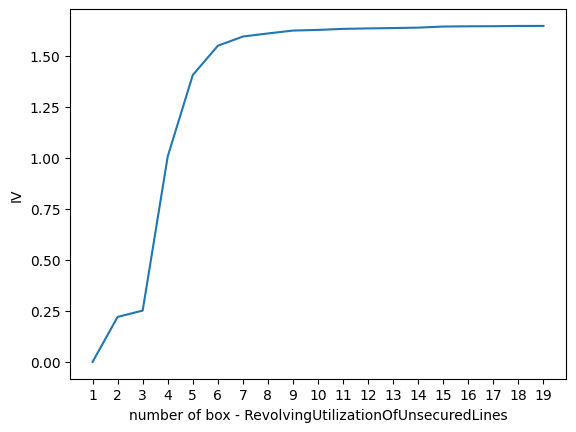

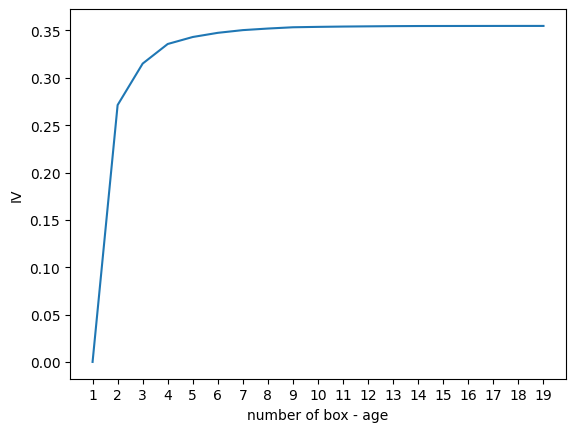

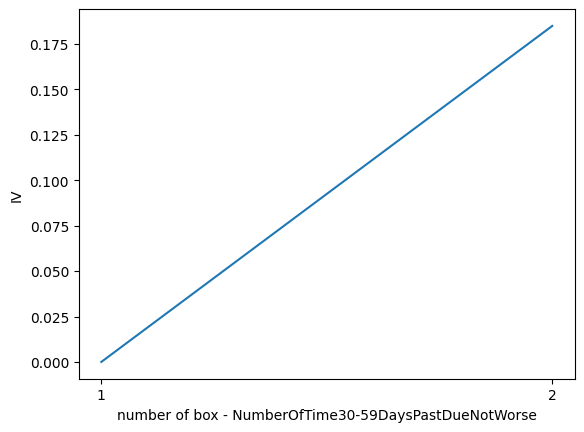

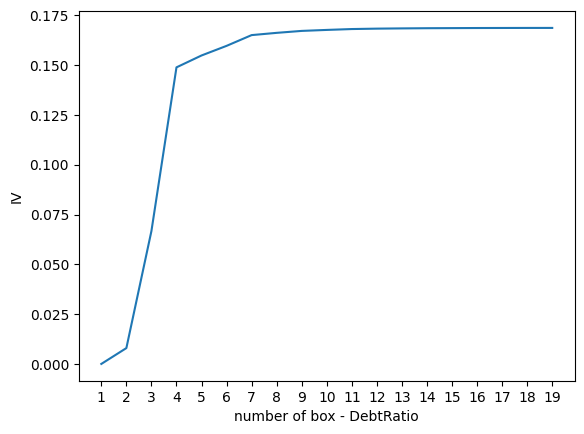

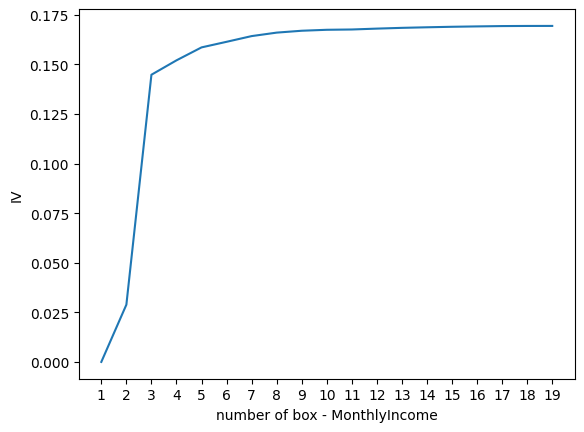

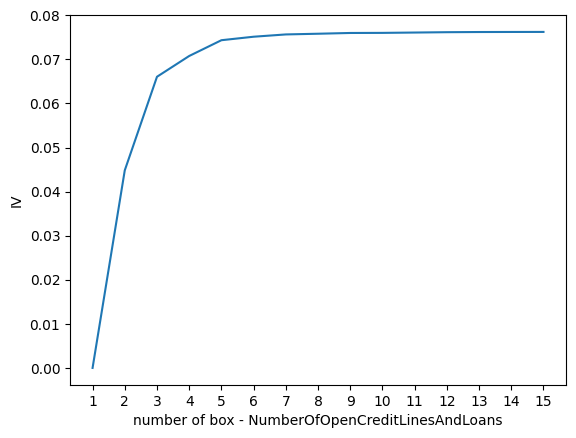

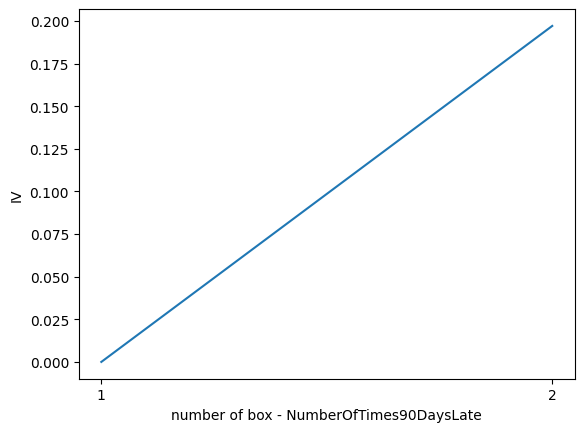

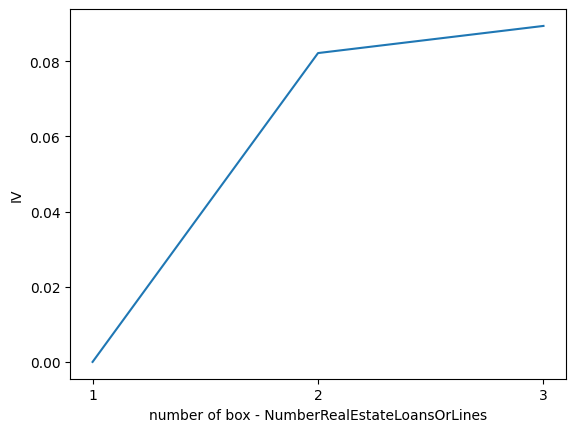

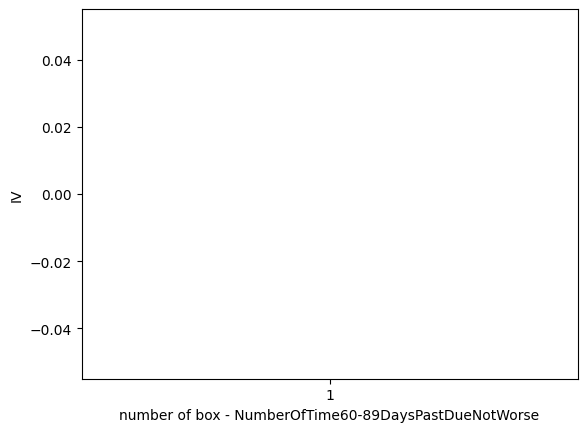

In [23]:
# 对训练集查看分箱的最优数
col = [each for each in train_data.columns if each not in [ 'SeriousDlqin2yrs','NumberOfDependents']]
for columns in col:
    graphforbestbin(train_data,columns,"SeriousDlqin2yrs",n=1,q=20,graph=True)

In [24]:
# 确定的分箱自动处理
sure_bins = {"RevolvingUtilizationOfUnsecuredLines":5,
            "age":5,
            "DebtRatio":4,
            "MonthlyIncome":3,
            "NumberOfOpenCreditLinesAndLoans":5
           }
# 不确定的分箱单独处理
unsure_bin = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13],
              "NumberOfTimes90DaysLate":[0,1,2,17],
              "NumberRealEstateLoansOrLines":[0,1,2,54],
              "NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,9],
              "NumberOfDependents":[0,1,2,3]
              }
# 设置分箱区间区间结果使用 np.inf替换最大值，用-np.inf替换最小值
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in unsure_bin.items()}


In [25]:
# 训练数据集开始分箱
# 字典存储分箱结果
bin_of_col_train={}
# 生成确定分箱的分箱区间和分箱后的 IV 值
for col in sure_bins:
    bins_df=graphforbestbin(train_data,
                            col,
                            'SeriousDlqin2yrs',
                            n=sure_bins[col],
                            q=20,
                            graph=False)
    bins_list=sorted(set(bins_df["min"]).union(bins_df["max"]))
    #保证区间覆盖使用 np.inf 替换最大值 -np.inf 替换最小值
    bins_list[0],bins_list[-1]=-np.inf,np.inf
    bin_of_col_train[col]=bins_list
#合并手动分箱数据
bin_of_col_train.update(hand_bins)
bin_of_col_train

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.2210384776739146,
  0.553220767753466,
  0.9834211260152762,
  0.9999999,
  inf],
 'age': [-inf, 34.0, 52.0, 61.0, 74.0, inf],
 'DebtRatio': [-inf, 0.01798063235, 0.358770857, 1.4577514042290627, inf],
 'MonthlyIncome': [-inf, 0.11, 5600.0, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf, 1.0, 3.0, 5.0, 17.0, inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}

In [26]:
# 获取WOE值
def get_woe(df,col,y,bins):
    df=df[[col,y]].copy()
    df["cut"]=pd.cut(df[col],bins)
    bins_df=df.groupby("cut")[y].value_counts().unstack()
    woe=bins_df["woe"]=np.log((bins_df[0]/bins_df[0].sum())/(bins_df[1]/bins_df[1].sum()))
    return woe

#将所有特征的WOE存储到字典当中
woeall={}
for col in bin_of_col_train:
    woeall[col]=get_woe(train_data,col,"SeriousDlqin2yrs",bin_of_col_train[col])
woeall

{'RevolvingUtilizationOfUnsecuredLines': cut
 (-inf, 0.221]     1.671535
 (0.221, 0.553]   -0.107956
 (0.553, 0.983]   -1.177314
 (0.983, 1.0]     -0.473250
 (1.0, inf]       -2.069816
 dtype: float64,
 'age': cut
 (-inf, 34.0]   -0.559895
 (34.0, 52.0]   -0.310964
 (52.0, 61.0]    0.168104
 (61.0, 74.0]    0.975849
 (74.0, inf]     1.782667
 dtype: float64,
 'DebtRatio': cut
 (-inf, 0.018]     1.521811
 (0.018, 0.359]    0.056982
 (0.359, 1.458]   -0.354249
 (1.458, inf]      0.178619
 dtype: float64,
 'MonthlyIncome': cut
 (-inf, 0.11]      1.440549
 (0.11, 5600.0]   -0.241169
 (5600.0, inf]     0.233031
 dtype: float64,
 'NumberOfOpenCreditLinesAndLoans': cut
 (-inf, 1.0]   -0.857065
 (1.0, 3.0]    -0.333433
 (3.0, 5.0]    -0.076292
 (5.0, 17.0]    0.135717
 (17.0, inf]    0.426498
 dtype: float64,
 'NumberOfTime30-59DaysPastDueNotWorse': cut
 (-inf, 0.0]    0.357170
 (0.0, 1.0]    -0.893761
 (1.0, 2.0]    -1.365194
 (2.0, inf]    -1.517520
 dtype: float64,
 'NumberOfTimes90DaysLate

In [27]:
bin_of_col_train
woe = woeall

In [28]:
# 创建WOE dataframe
train_data_woe=pd.DataFrame(index=train_data.index)
# 对所有特征进行映射：
for col in bin_of_col_train:
    train_data_woe[col]=pd.cut(train_data[col],bin_of_col_train[col]).map(woe[col])
# 添加标签
train_data_woe["SeriousDlqin2yrs"]=train_data["SeriousDlqin2yrs"]
train_data_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,-2.069816,-0.310964,-0.354249,0.233031,0.135717,0.357170,-2.238555,0.185675,-1.425801,-0.490818,1
1,-0.107956,-0.559895,0.056982,-0.241169,-0.076292,0.357170,0.238342,-0.396573,0.127662,-0.521633,1
2,-2.069816,-0.559895,0.056982,-0.241169,-0.333433,-0.893761,0.238342,-0.396573,0.127662,0.668130,1
3,-0.107956,-0.310964,-0.354249,-0.241169,0.135717,-0.893761,0.238342,0.185675,0.127662,-0.539965,0
4,1.671535,-0.310964,0.056982,0.233031,0.135717,0.357170,0.238342,0.185675,0.127662,-0.521633,0


In [29]:
train_data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1.075406,44,0,0.462179,5800.00000,6,2,1,1,3.052646
1,1,0.476085,33,0,0.278937,2799.33788,4,0,0,0,0.662120
2,1,1.150258,26,1,0.150869,1500.00000,2,0,0,0,0.000000
3,0,0.247153,38,1,0.845089,2962.00000,9,0,1,0,2.000000
4,0,0.172251,41,0,0.332067,10000.00000,9,0,1,0,1.000000


In [30]:
# 测试集处理
test_data_woe = pd.DataFrame(index=test_data.index)
# 训练集和测试集同一个分箱列
for col in bin_of_col_train:
    test_data_woe[col] = pd.cut(test_data[col],bin_of_col_train[col]).map(woe[col])
test_data_woe["SeriousDlqin2yrs"] = test_data["SeriousDlqin2yrs"]
test_data_woe.head()

,RevolvingUtilizationOfUnsecuredLines,age,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,SeriousDlqin2yrs
0,1.671535,-0.559895,0.056982,-0.241169,-0.857065,0.357170,0.238342,-0.396573,0.127662,0.668130,0
1,1.671535,1.782667,-0.354249,0.233031,0.135717,0.357170,0.238342,0.267828,0.127662,0.668130,0
2,-0.107956,-0.310964,-0.354249,0.233031,0.135717,-0.893761,0.238342,0.649433,0.127662,-0.490818,1
3,-0.107956,0.975849,0.056982,0.233031,0.135717,-1.365194,-1.777121,0.649433,0.127662,0.668130,0
4,-0.107956,0.975849,-0.354249,0.233031,0.135717,0.357170,0.238342,0.649433,0.127662,-0.521633,0


In [31]:
train_data_woe.to_csv('train_data_woe.csv',index = False)
test_data_woe.to_csv('test_data_woe.csv',index = False)

In [32]:
col = [each for each in train_data_woe.columns if each != "SeriousDlqin2yrs" ]
col

['RevolvingUtilizationOfUnsecuredLines',
 'age',
 'DebtRatio',
 'MonthlyIncome',
 'NumberOfOpenCreditLinesAndLoans',
 'NumberOfTime30-59DaysPastDueNotWorse',
 'NumberOfTimes90DaysLate',
 'NumberRealEstateLoansOrLines',
 'NumberOfTime60-89DaysPastDueNotWorse',
 'NumberOfDependents']

In [33]:
# 模型输入的数据集构建
col = [each for each in train_data_woe.columns if each != "SeriousDlqin2yrs" ]
X_train = train_data_woe[col]
y_train=train_data_woe['SeriousDlqin2yrs']
X_test=test_data_woe[col]
y_test=test_data_woe['SeriousDlqin2yrs']
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(208938, 10)
(208938,)
(69646, 10)
(69646,)


In [34]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression().fit(X_train, y_train)
# 查看得分
print(lr.score(X_test, y_test))

0.7859891451052465


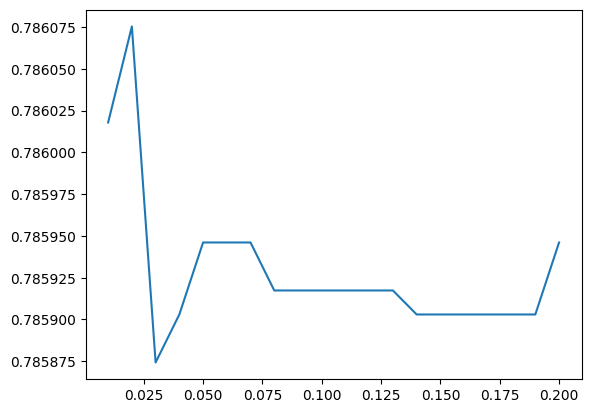

In [35]:
c_1 = np.linspace(0.01,0.2,20)
score = []
for i in c_1:
    lr = LR(solver='liblinear',C=i).fit(X_train,y_train)
    score.append(lr.score(X_test,y_test))
plt.figure()
plt.plot(c_1,score)
plt.show()

d:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
d:\python\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


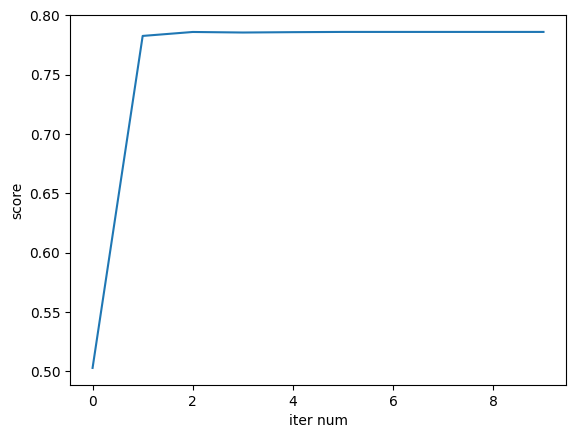

In [36]:
score = []
find_list = list(range(10))
for i in find_list:
    lr = LR(solver='liblinear',C=0.025,max_iter=i).fit(X_train,y_train)
    score.append(lr.score(X_test,y_test))
plt.figure()
plt.plot(find_list,score)
plt.xlabel("iter num")
plt.ylabel("score")
plt.show()

<AxesSubplot: title={'center': 'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

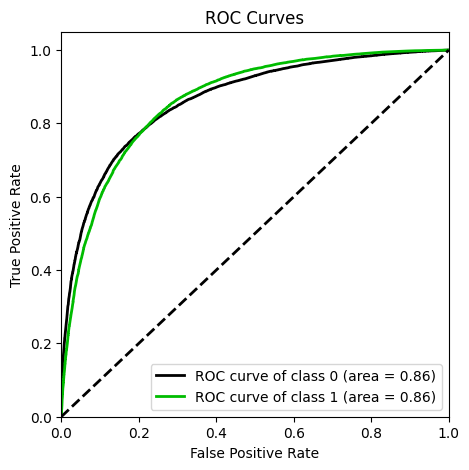

In [37]:
# 模型评估
import scikitplot as skplt
vali_proba_df = pd.DataFrame(lr.predict_proba(X_test))
skplt.metrics.plot_roc(y_test,
                       vali_proba_df,
                       plot_micro=False,
                       figsize=(5,5),
                       plot_macro=False)

In [38]:
B = 20/np.log(2)
A = 600 + B*np.log(1/60)

B,A

(28.85390081777927, 481.8621880878296)

In [39]:
base_score = A - B*lr.intercept_
base_score

array([481.66271489])

In [40]:
lr.intercept_

array([0.00691321])

In [41]:
lr.coef_

array([[-0.73146147, -0.3159584 , -0.84518271, -0.48396432, -0.24802188,
        -0.56189538, -0.56230554, -0.92399862, -0.28528301, -0.82958438]])

In [42]:
for i,col in enumerate(X_train.columns):
    print(col)

RevolvingUtilizationOfUnsecuredLines
age
DebtRatio
MonthlyIncome
NumberOfOpenCreditLinesAndLoans
NumberOfTime30-59DaysPastDueNotWorse
NumberOfTimes90DaysLate
NumberRealEstateLoansOrLines
NumberOfTime60-89DaysPastDueNotWorse
NumberOfDependents


In [43]:
score_RevolvingUtilizationOfUnsecuredLines = woe["RevolvingUtilizationOfUnsecuredLines"] * (-B*lr.coef_[0][0])
print(score_RevolvingUtilizationOfUnsecuredLines)

cut
(-inf, 0.221]     35.278610
(0.221, 0.553]    -2.278465
(0.553, 0.983]   -24.847818
(0.983, 1.0]      -9.988191
(1.0, inf]       -43.684543
dtype: float64


In [45]:
file = "ScoreRes.csv"
with open(file,"w") as f:
    f.write("base_score,{}\n".format(base_score))
for i,col in enumerate(X_train.columns):
    score = woe[col] * (-B*lr.coef_[0][i])
    score.name = "Score"
    score.index.name = col
    score.to_csv(file,header=True,mode="a")

In [52]:
X_test.iloc[0]

RevolvingUtilizationOfUnsecuredLines    1.671535
age                                    -0.559895
DebtRatio                               0.056982
MonthlyIncome                          -0.241169
NumberOfOpenCreditLinesAndLoans        -0.857065
NumberOfTime30-59DaysPastDueNotWorse    0.357170
NumberOfTimes90DaysLate                 0.238342
NumberRealEstateLoansOrLines           -0.396573
NumberOfTime60-89DaysPastDueNotWorse    0.127662
NumberOfDependents                      0.668130
Name: 0, dtype: float64

In [53]:
# 保存训练完结束的模型
import joblib
joblib.dump(lr, "ScoreCard.pkl")

['ScoreCard.pkl']

In [67]:
X_test.iloc[0, :]

RevolvingUtilizationOfUnsecuredLines    1.671535
age                                    -0.559895
DebtRatio                               0.056982
MonthlyIncome                          -0.241169
NumberOfOpenCreditLinesAndLoans        -0.857065
NumberOfTime30-59DaysPastDueNotWorse    0.357170
NumberOfTimes90DaysLate                 0.238342
NumberRealEstateLoansOrLines           -0.396573
NumberOfTime60-89DaysPastDueNotWorse    0.127662
NumberOfDependents                      0.668130
Name: 0, dtype: float64

In [76]:
# 加载和预测
new_lr = joblib.load("ScoreCard.pkl")

# proba = new_lr.predict_proba(X_test.loc[0, :].values.reshape(1, -1))
# proba = new_lr.predict_proba([X_test.loc[0, :]])
proba = new_lr.predict_proba(pd.DataFrame([X_test.loc[0, :]]))
proba_class = new_lr.predict(pd.DataFrame([X_test.loc[0, :]]))
# 预测值
print(proba)
# 预测所属类别
print(proba_class)

[[0.78863024 0.21136976]]
[0]
